In [1]:
# Churn Problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np

In [3]:
churn = pd.read_csv('C:....churn.csv')

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account_Length  3333 non-null   int64  
 2   AreaCode        3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   IntlPlan        3333 non-null   object 
 5   VMailPlan       3333 non-null   object 
 6   VMailMessage    3333 non-null   int64  
 7   DayMins         3333 non-null   float64
 8   DayCalls        3333 non-null   int64  
 9   DayCharge       3333 non-null   float64
 10  EveMins         3333 non-null   float64
 11  EveCalls        3333 non-null   int64  
 12  EveCharge       3333 non-null   float64
 13  NightMins       3333 non-null   float64
 14  NightCalls      3333 non-null   int64  
 15  NightCharge     3333 non-null   float64
 16  IntlMins        3333 non-null   float64
 17  IntlCalls       3333 non-null   i

In [5]:
churn.head(5)

,State,Account_Length,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# convert object to categorical

selected = ["State","AreaCode","IntlPlan", "VMailPlan", "Churn"]
for i in selected:
    churn[i] = churn[i].astype("category")

In [7]:
churn["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

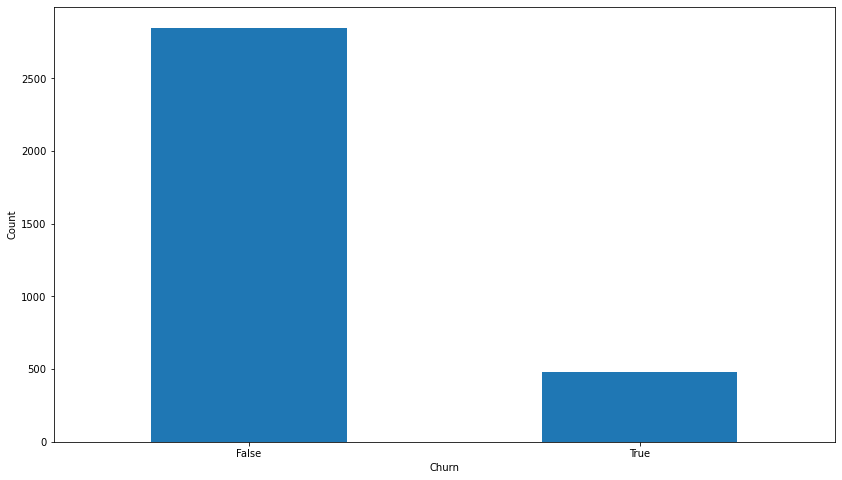

In [8]:
fig, ax = plt.subplots()

churn.groupby(churn["Churn"]).size().plot(kind='bar',figsize=(14,8),rot=0)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [9]:
churn.groupby(churn["Churn"]).size().transform(lambda x: x/len(churn)*100)

Churn
False    85.508551
True     14.491449
dtype: float64

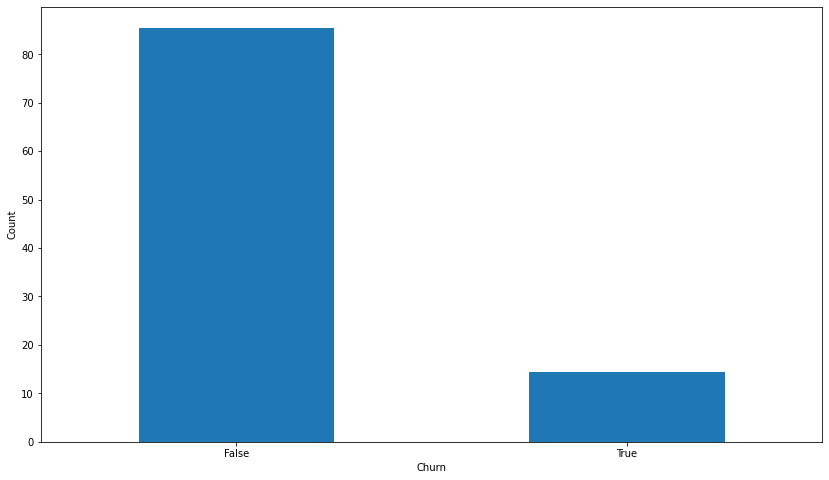

In [10]:
fig, ax = plt.subplots()

churn.groupby(churn["Churn"]).size().transform(lambda x: x/len(churn)*100).plot(kind='bar',figsize=(14,8),rot=0)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [11]:
df1 = churn.select_dtypes(np.number)

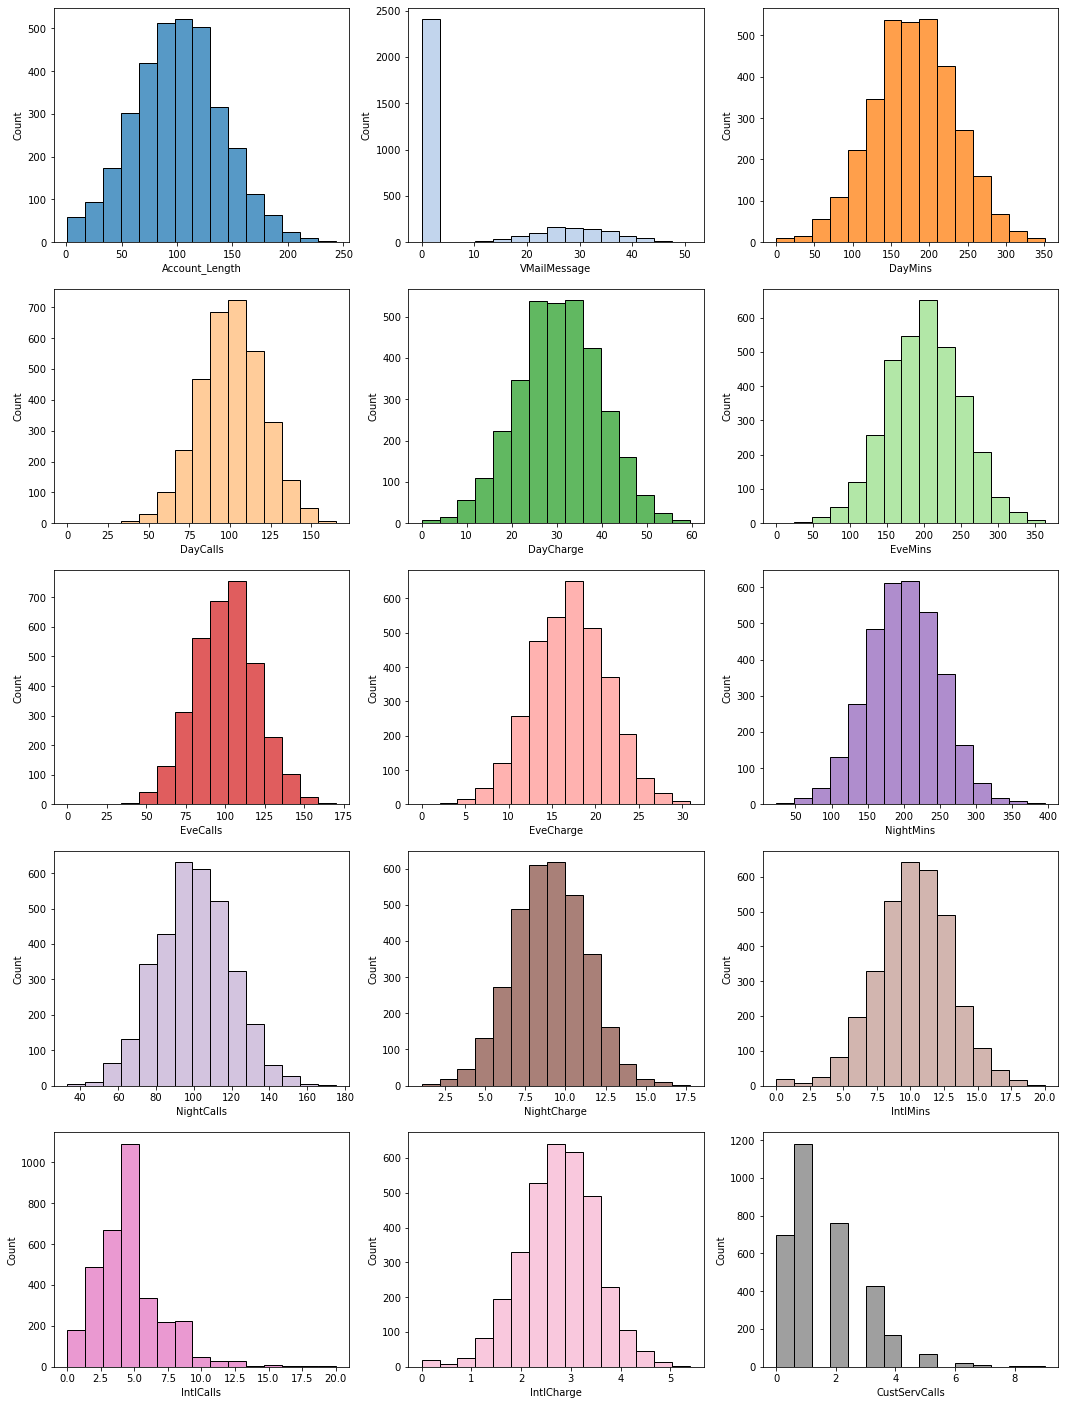

In [12]:
num_subplots = 15
ncols = 3
nrows = (num_subplots + ncols - 1) // ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols * 6, nrows * 5))
colors = plt.cm.tab20.colors
for ax, stat, color in zip(np.ravel(axes), df1.columns, colors):
    sns.histplot(df1, x=df1[stat], kde=False,color=color, bins=15, ax = ax)
#for ax in np.ravel(axes)[num_subplots:]:  # remove possible empty subplots at the end
#    ax.remove()
plt.show()


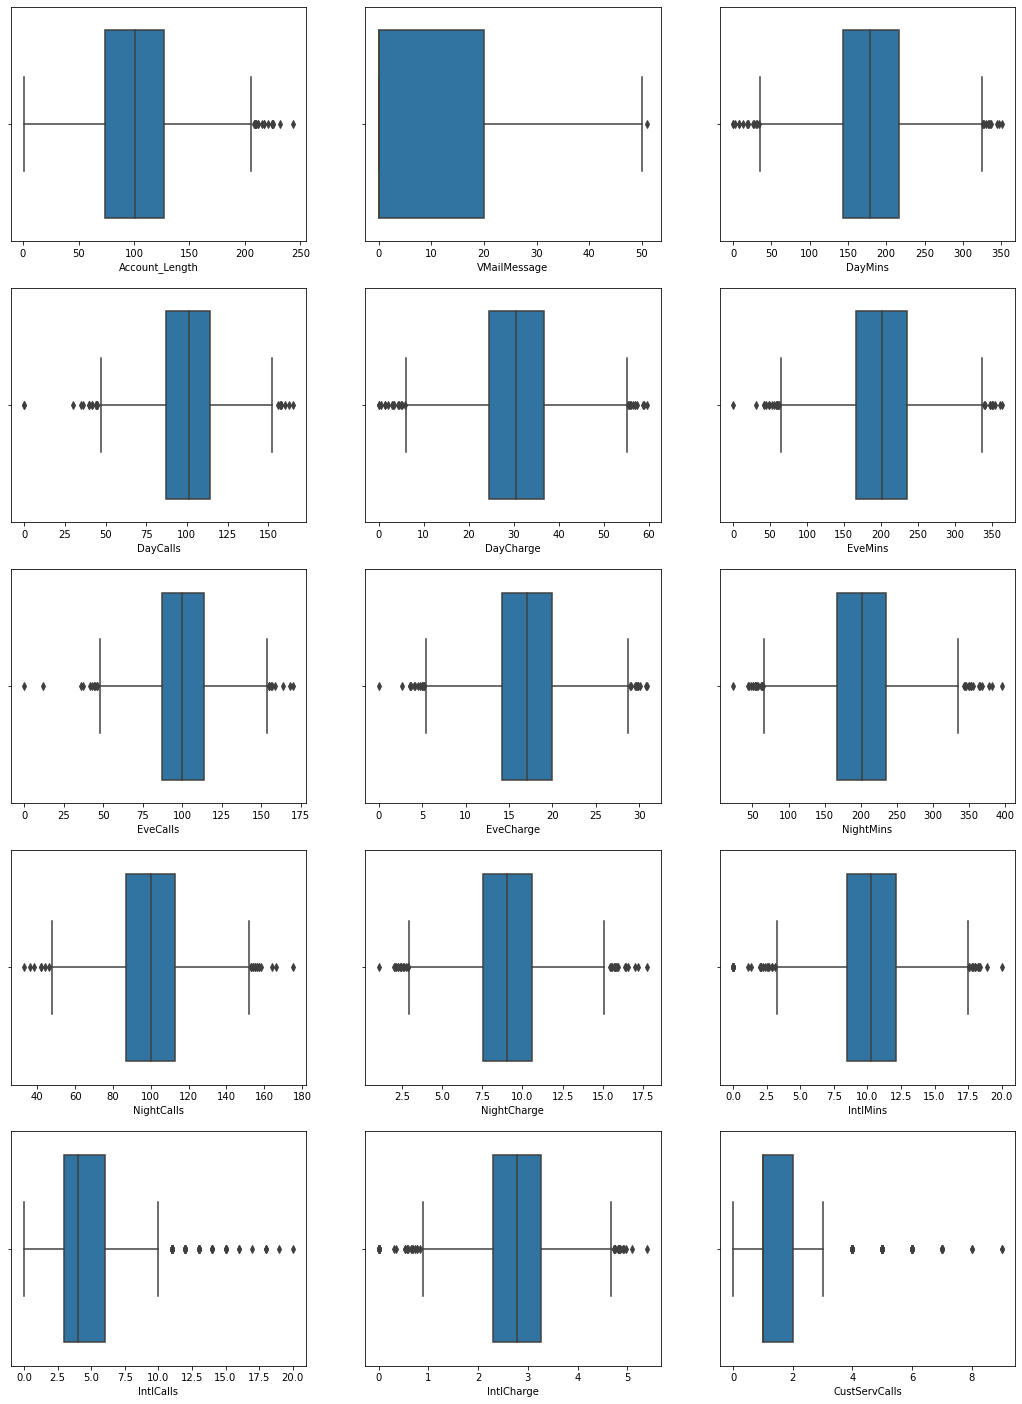

In [13]:
num_subplots = 15
ncols = 3
nrows = (num_subplots + ncols - 1) // ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols * 6, nrows * 5))
colors = plt.cm.tab20.colors
for ax, stat, color in zip(np.ravel(axes), df1.columns, colors):
    sns.boxplot(x=df1[stat], ax = ax)
#for ax in np.ravel(axes)[num_subplots:]:  # remove possible empty subplots at the end
#    ax.remove()
plt.show()


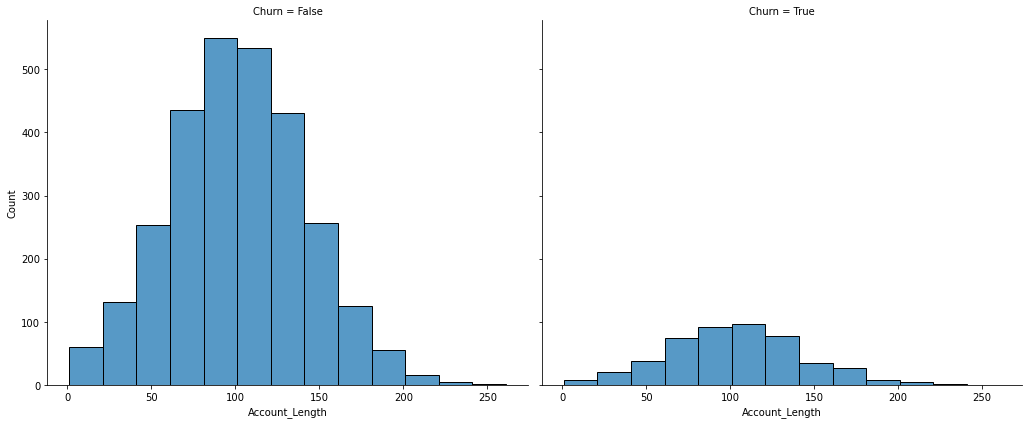

In [14]:
sns.displot(churn, x='Account_Length', col="Churn",binwidth=20, height=6, aspect=1.2,)
sns.despine()

In [15]:
df2 = df1

In [16]:
df2.loc[:,"Churn"] = churn.loc[:,"Churn"].copy()

C:\Users\ushaa\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ushaa\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [17]:
df3 = df2.loc[df2.Churn== True,]
df4 = df2.loc[df2.Churn== False,]

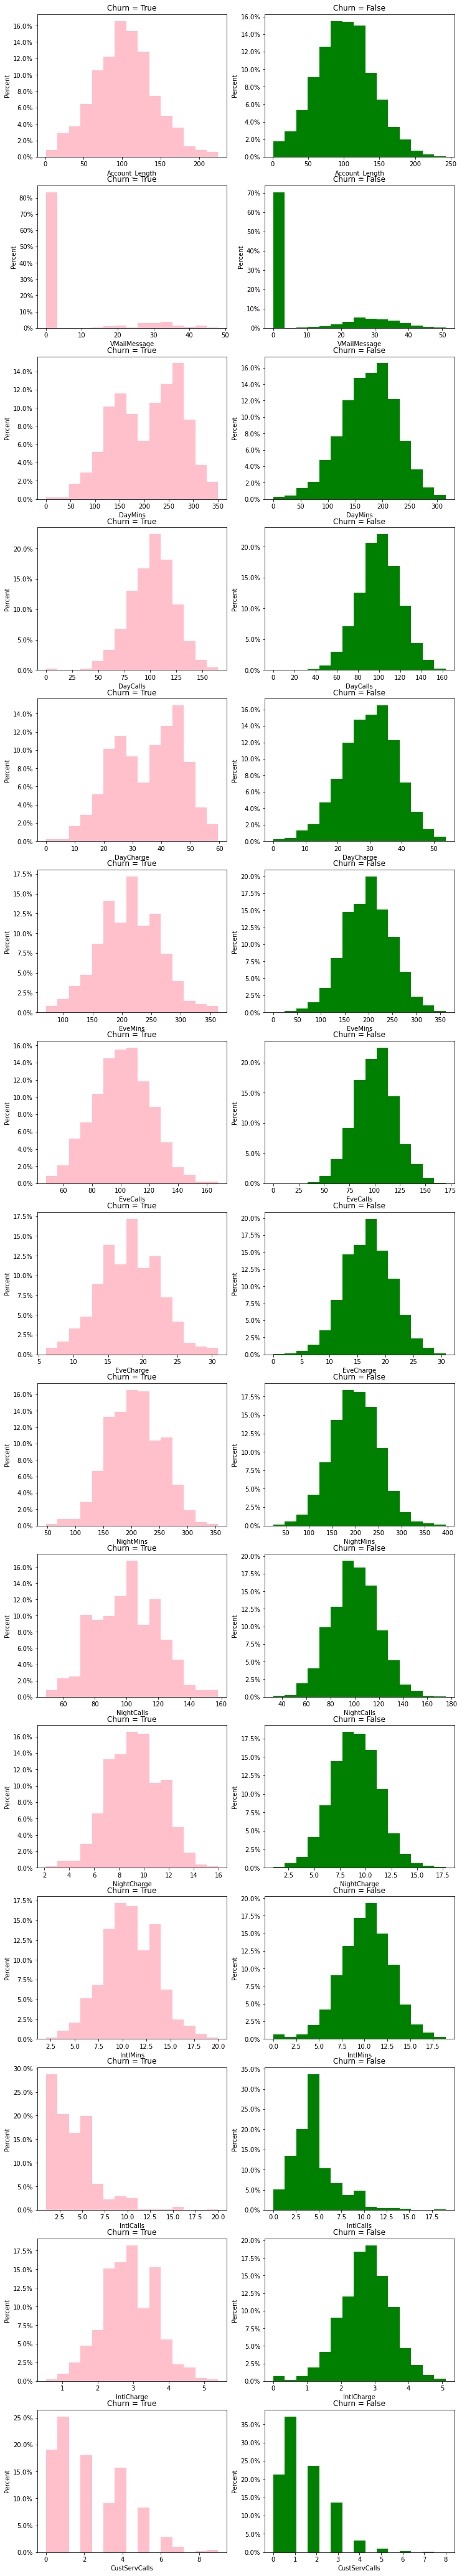

In [18]:
#df4 = df2.loc[df2.Churn== False,]

num_subplots = 30
ncols = 2
nrows = (num_subplots + ncols - 1) // ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols * 6, nrows * 5))

for i, stat in zip(range(df1.shape[1]-1), df1.columns):
    axes[i,0].hist(df3[stat], weights=np.ones(len(df3))/ len(df3), bins=15, color = "pink")
    axes[i,0].set_ylabel('Percent')
    axes[i,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
    axes[i,0].set_xlabel(stat)
    axes[i,0].set_title('Churn = True')
    axes[i,1].hist(df4[stat], weights=np.ones(len(df4))/ len(df4),bins=15, color = "green")
    axes[i,1].set_ylabel('Percent')
    axes[i,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
    axes[i,1].set_xlabel(stat)
    axes[i,1].set_title('Churn = False')
    

plt.show()

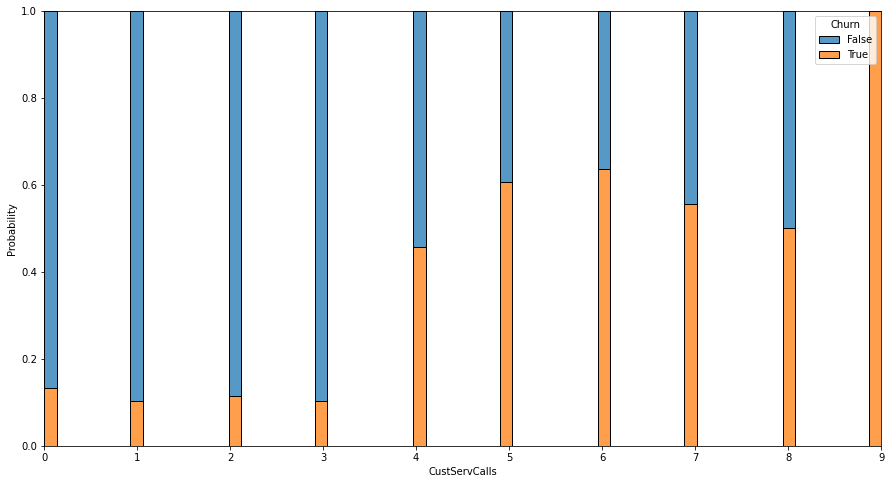

In [19]:
# normalized histogram for Customer Severice Calls

plt.figure(figsize=(15,8))
sns.histplot(churn, x="CustServCalls", hue="Churn", stat="probability", multiple="fill")
plt.show()

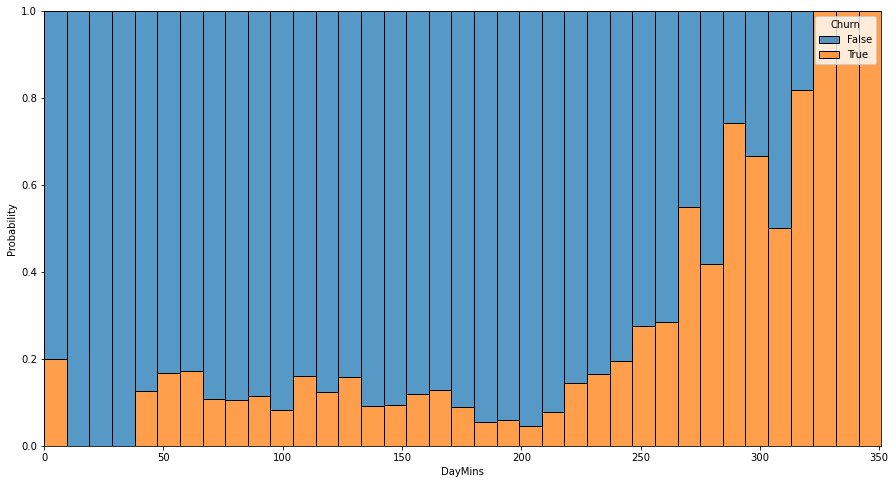

In [20]:
# normalized histogram for Day Minutes

plt.figure(figsize=(15,8))
sns.histplot(churn, x="DayMins", hue="Churn", stat="probability", multiple="fill")
plt.show()

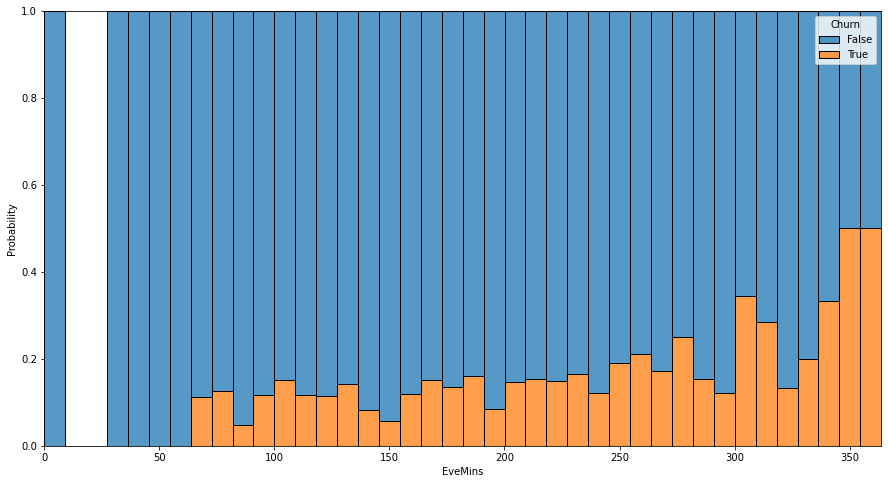

In [21]:
# normalized histogram for Evening Minutes

plt.figure(figsize=(15,8))
sns.histplot(churn, x="EveMins", hue="Churn", stat="probability", multiple="fill")
plt.show()

In [22]:
#churn.groupby("Account_Lenght", "Churn")
churn.groupby('Churn').agg(['count', 'sum', 'mean'])

Account_Length                     VMailMessage                   \
               count     sum        mean        count    sum      mean   
Churn                                                                    
False           2850  287262  100.793684         2850  24523  8.604561   
True             483   49587  102.664596          483   2471  5.115942   

      DayMins                       DayCalls  ...   IntlMins IntlCalls         \
        count       sum        mean    count  ...       mean     count    sum   
Churn                                         ...                               
False    2850  499250.9  175.175754     2850  ...  10.158877      2850  12919   
True      483   99939.5  206.914079      483  ...  10.700000       483   2011   

                IntlCharge                    CustServCalls                  
           mean      count      sum      mean         count   sum      mean  
Churn                                                                        
False  4.532982       2850  7818.70  2.743404          2850  4132  1.449825  
True   4.163561        483  1395.65  2.889545           483  1077  2.229814  

[2 rows x 45 columns]

In [23]:
df5 = df1

In [24]:
df5 = churn.select_dtypes(exclude = np.number)
df5 = df5.loc[:,df5.columns != "Phone"]

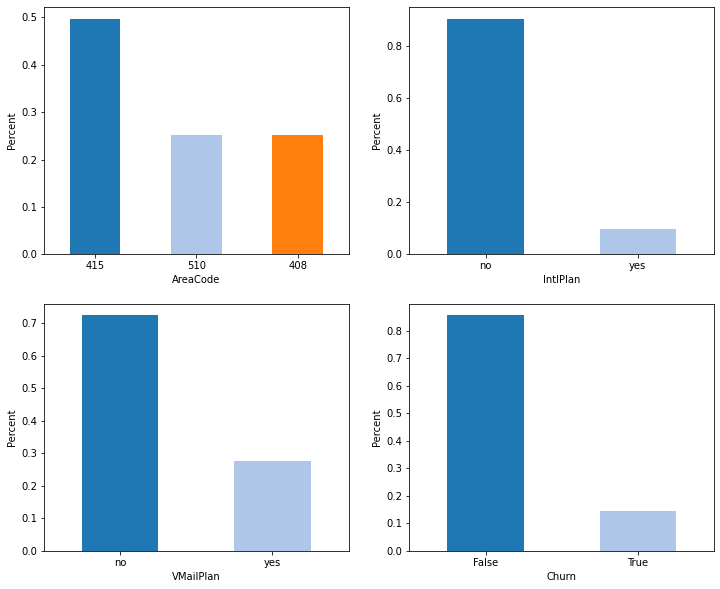

In [25]:
num_subplots = 4
ncols = 2
nrows = (num_subplots + ncols - 1) // ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols * 6, nrows * 5))
colors = plt.cm.tab20.colors

for ax, stat, color in zip(np.ravel(axes), df5.iloc[:,[1,2,3,4]].columns, colors):
    df5[stat].value_counts(normalize = True).plot(kind='bar', color=colors, rot=0, ax=ax)
    ax.set_xlabel(stat)
    ax.set_ylabel('Percent')
plt.show()

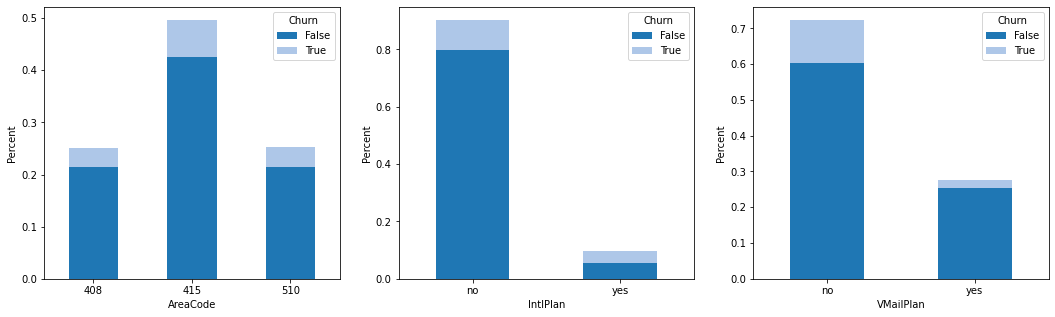

In [26]:
num_subplots = 3
ncols = 3
nrows = (num_subplots + ncols - 1) // ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols * 6, nrows * 5))
colors = plt.cm.tab20.colors

for ax, stat, color in zip(np.ravel(axes), df5.iloc[:,[1,2,3,4]].columns, colors):
    pd.crosstab(index=df5[stat], columns=df5['Churn'],normalize = True).plot(kind='bar', stacked=True, 
                                                                               color=colors, rot=0, ax=ax)
    ax.set_xlabel(stat)
    ax.set_ylabel('Percent')
plt.show()

In [27]:
# Contingency table of Intl Plan with Churn (total)

pd.crosstab(index=df5['Churn'], columns=df5['IntlPlan'],normalize = False)

IntlPlan,no,yes
Churn,,
False,2664,186
True,346,137


In [28]:
# Contingency table of Intl Plan with Churn (Percent)

pd.crosstab(index=df5['Churn'], columns=df5['IntlPlan'],normalize = 'columns')

IntlPlan,no,yes
Churn,,
False,0.88505,0.575851
True,0.11495,0.424149


In [29]:
# Contingency table of Voice Mail Plan with Churn (total)

pd.crosstab(index=df5['Churn'], columns=df5['VMailPlan'],normalize = False)

VMailPlan,no,yes
Churn,,
False,2008,842
True,403,80


In [30]:
# Contingency table of Voice Mail Plan with Churn (percent)

pd.crosstab(index=df5['Churn'], columns=df5['VMailPlan'],normalize = 'columns')

VMailPlan,no,yes
Churn,,
False,0.832849,0.913232
True,0.167151,0.086768


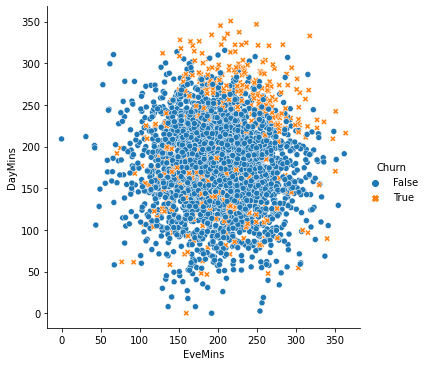

In [31]:
sns.relplot(
    data=churn, x='EveMins',y='DayMins',
    hue="Churn", style="Churn",
    kind="scatter"
)
plt.show()

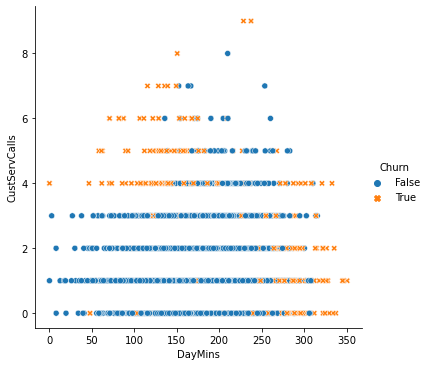

In [32]:
sns.relplot(
    data=churn,x = 'DayMins', y = 'CustServCalls',
    hue="Churn", style="Churn",
    kind="scatter"
)
plt.show()

In [33]:
churn.groupby('Churn').agg(['mean'])

,Account_Length,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Churn,,,,,,,,,,,,,,,
False,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [34]:
corr = churn.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Account_Length,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls
Account_Length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
VMailMessage,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
DayMins,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
DayCalls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
DayCharge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
EveMins,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
EveCalls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
EveCharge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
NightMins,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
NightCalls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802
